In [11]:
import pydicom
import matplotlib.pyplot as plt

dcm_azure=pydicom.dcmread(r"C:\Users\Asus\dicomservice\azure-dicom-files\blue-circle-2.dcm")
dcm_azure

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 242
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.13273713909719068980354078852867170114
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.27364069006046809016231924679252811609
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.4.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.368004

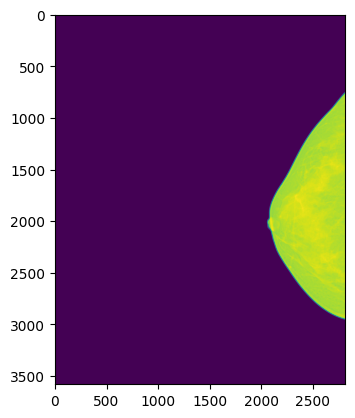

In [20]:
import pydicom
import matplotlib.pyplot as plt

dcm=pydicom.dcmread(r"C:\Users\Asus\dicomservice\5fb79402e56f9fe17bb7adafe792cb07.dicom")
plt.imshow(dcm.pixel_array)

In [21]:
dcm

c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: '5fb79402e56f9fe17bb7adafe792cb07'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 5fb79402e56f9fe17bb7adafe792cb07
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 5fb79402e56f9fe17bb7adafe792cb07
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'IMS s.r.l.'
(0008, 1090) Manufacturer's Model Name           LO: 'GIOTTO IMAGE 3DL'
(0010, 0040) Pa

In [22]:
import re

str_SOPInstanceUID = dcm.SOPInstanceUID
numeric_str_SOPInstanceUID = re.sub(r'\D', '', str_SOPInstanceUID) # remove non-numeric characters
#int_SOPInstanceUID = int(numeric_str_SOPInstanceUID)
dcm.SOPInstanceUID = "1.2.3.4" + "." + numeric_str_SOPInstanceUID
        
        # cinvert StudyInstanceUID to DICOM UID standard
str_StudyInstanceUID = dcm.StudyInstanceUID
numeric_StudyInstanceUID = re.sub(r'\D', '', str_StudyInstanceUID)
#int_StudyInstanceUID = int(numeric_StudyInstanceUID)
dcm.StudyInstanceUID = "1.2.3.4" +"." + numeric_StudyInstanceUID
        
        # convert SeriesInstanceUID to DICOM UID standard
str_SeriesInstanceUID = dcm.SeriesInstanceUID
numeric_SeriesInstanceUID = re.sub(r'\D', '', str_SeriesInstanceUID)
#int_SeriesInstanceUID = int(numeric_SeriesInstanceUID)
dcm.SeriesInstanceUID = "1.2.3.4" + "." + numeric_SeriesInstanceUID

In [23]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 5fb79402e56f9fe17bb7adafe792cb07
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.3.4.57940256917779207
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'IMS s.r.l.'
(0008, 1090) Manufacturer's Model Name           LO: 'GIOTTO IMAGE 3DL'
(0010, 0040) Patient's

In [4]:
print(dcm.SOPInstanceUID)

4d59a1f3bc1183b998c28b18f531fb9d


In [5]:
#check type of SOPInstanceUID
print(type(dcm.SOPInstanceUID))

<class 'pydicom.uid.UID'>


In [7]:
#check is SOPInstanceUID in numeric or not
if dcm.SOPInstanceUID.isnumeric():
    print("SOPInstanceUID is numeric")
else:
    print("SOPInstanceUID is not numeric")

SOPInstanceUID is not numeric


In [13]:
if dcm.SeriesInstanceUID.isnumeric():
    print("SeriesInstanceUID is numeric")
else:
    print("SeriesInstanceUID is not numeric")

SeriesInstanceUID is not numeric


In [10]:
if dcm.StudyInstanceUID.isnumeric():
    print("StudyInstanceUID is numeric")
else:
    print("StudyInstanceUID is not numeric")

StudyInstanceUID is not numeric


In [18]:
elem = dcm[0x0002, 0x0012]

KeyError: (0002, 0012)

In [32]:
import re

if dcm.SeriesInstanceUID.isnumeric():
    print("SeriesInstanceUID is numeric")
else:
    print("SeriesInstanceUID is not numeric, let's modify it")
    # modifiy SeriesInstanceUID
    str_SeriesInstanceUID = dcm.SeriesInstanceUID
    print(str_SeriesInstanceUID)
    numeric_string = re.sub(r'\D', '', str_SeriesInstanceUID)
    numeric_value = int(numeric_string)
    print(numeric_value)
    dcm.SeriesInstanceUID = "1.2.3.4"+"."+str(numeric_value)

SeriesInstanceUID is not numeric, let's modify it
1.2.3.4.15850975825103962671003
123415850975825103962671003


In [33]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 4d59a1f3bc1183b998c28b18f531fb9d
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 4d59a1f3bc1183b998c28b18f531fb9d
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'IMS s.r.l.'
(0008, 1090) Manufacturer's Model Name           LO: 'GIOTTO IMAGE 3DL'
(0010, 0040) Pa

In [28]:
dcm.SeriesInstanceUID="158bd509758a251039c6f2671b0cc0f3"

c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: '158bd509758a251039c6f2671b0cc0f3'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [38]:
import pydicom

def is_valid_uid(uid):
    try:
        pydicom.uid.UID(uid)
        return True
    except ValueError:
        return False

# Example usage
uid = "158bd509758a251039c6f2671b0cc0f3"
if is_valid_uid(uid):
    print("Valid DICOM UID")
else:
    print("Invalid DICOM UID")

Valid DICOM UID


check type

In [14]:
import pydicom 
import os

dicom_dir = r'C:\Users\Asus\dicomservice\vindrmammo-dicom-files'
folder_names = os.listdir(dicom_dir)

# test type of SOPInstanceUID, StudyInstanceUID, SeriesInstanceUID
for folder_name in folder_names:
    folder_path = os.path.join(dicom_dir, folder_name)
    dcm_files = os.listdir(folder_path)
    for dcm_file in dcm_files:
        dcm_path = os.path.join(folder_path, dcm_file)
        dcm = pydicom.dcmread(dcm_path)
        print(type(dcm.SOPInstanceUID))
        print(type(dcm.StudyInstanceUID))
        print(type(dcm.SeriesInstanceUID))

<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydi

convert SOPInstanceUID, StudyInstanceUID, SeriesInstanceUID to DICOM UID standard

In [24]:

import pydicom 
import os
import re

dicom_dir = r'C:\Users\Asus\dicomservice\vindrmammo-dicom-files'
folder_names = os.listdir(dicom_dir)

for folder_name in folder_names:
    folder_path = os.path.join(dicom_dir, folder_name)
    dcm_files = os.listdir(folder_path)
    for dcm_file in dcm_files:
        dcm_path = os.path.join(folder_path, dcm_file)
        dcm = pydicom.dcmread(dcm_path)
        
        # convert SOPInstanceUID to DICOM UID standard
        str_SOPInstanceUID = dcm.SOPInstanceUID
        numeric_str_SOPInstanceUID = re.sub(r'\D', '', str_SOPInstanceUID) # remove non-numeric characters
        dcm.SOPInstanceUID = "1.2.3.4" + "." + numeric_str_SOPInstanceUID
        
        # convert StudyInstanceUID to DICOM UID standard
        str_StudyInstanceUID = dcm.StudyInstanceUID
        numeric_StudyInstanceUID = re.sub(r'\D', '', str_StudyInstanceUID)
        dcm.StudyInstanceUID = "1.2.3.4" + "." + numeric_StudyInstanceUID
        
        # convert SeriesInstanceUID to DICOM UID standard
        str_SeriesInstanceUID = dcm.SeriesInstanceUID
        numeric_SeriesInstanceUID = re.sub(r'\D', '', str_SeriesInstanceUID)
        dcm.SeriesInstanceUID = "1.2.3.4" + "." + numeric_SeriesInstanceUID
        
        # save dcm
        dcm.save_as(dcm_path)

c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: '298bd294e8ca43bcf3c66574a66682c6'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: 'db72a9a3c5827c1982b9b6d953c3dc04'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: '524ff9e47fdcdddb9e127c48f034d2fc'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
c:\Users\Asus\anaconda3\envs\dicomservice\lib\site-packages\pydicom\valuerep.py:44

In [25]:
# test if the SOPInstanceUID, StudyInstanceUID, and SeriesInstanceUID are converted to DICOM UID standard

test2 = pydicom.dcmread(r'C:\Users\Asus\dicomservice\vindrmammo-dicom-files\1b43d2adcf3f300c550d3030b16c861f\4d59a1f3bc1183b998c28b18f531fb9d.dicom')
test2

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 4d59a1f3bc1183b998c28b18f531fb9d
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.3.4.45913118399828185319
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'IMS s.r.l.'
(0008, 1090) Manufacturer's Model Name           LO: 'GIOTTO IMAGE 3DL'
(0010, 0040) Patien

# check dicom file EMP

In [26]:
EMP_test = pydicom.dcmread(r'C:\Users\Asus\dicomservice\0000129279.dcm')
EMP_test

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Intra-Oral X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.82.1.1.1423.434247003.172.16.1.27.760850811.0.3.148080
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-2.0'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 762
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: Digital Intra-Oral X-Ray Image Storage - For Presentation
(0008, 0018) SOP Insta

In [31]:
#check type 
dicom_dir = r'C:\Users\Asus\dicomservice\EMP_DICOM'
folder_names = os.listdir(dicom_dir)

# test type of SOPInstanceUID, StudyInstanceUID, SeriesInstanceUID
for folder_name in folder_names:
    folder_path = os.path.join(dicom_dir, folder_name)
    dcm_files = os.listdir(folder_path)
    for dcm_file in dcm_files:
        dcm_path = os.path.join(folder_path, dcm_file)
        try:
            dcm = pydicom.dcmread(dcm_path, force=True)
            print(type(dcm.SOPInstanceUID))
            print(type(dcm.StudyInstanceUID))
            print(type(dcm.SeriesInstanceUID))
        except:
            print(f'Error reading {dcm_path}')
            continue

<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydicom.uid.UID'>
<class 'pydi